In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)

In [5]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df[['Drug']].values

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=19)

In [7]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

DECISION TREE chizamiz

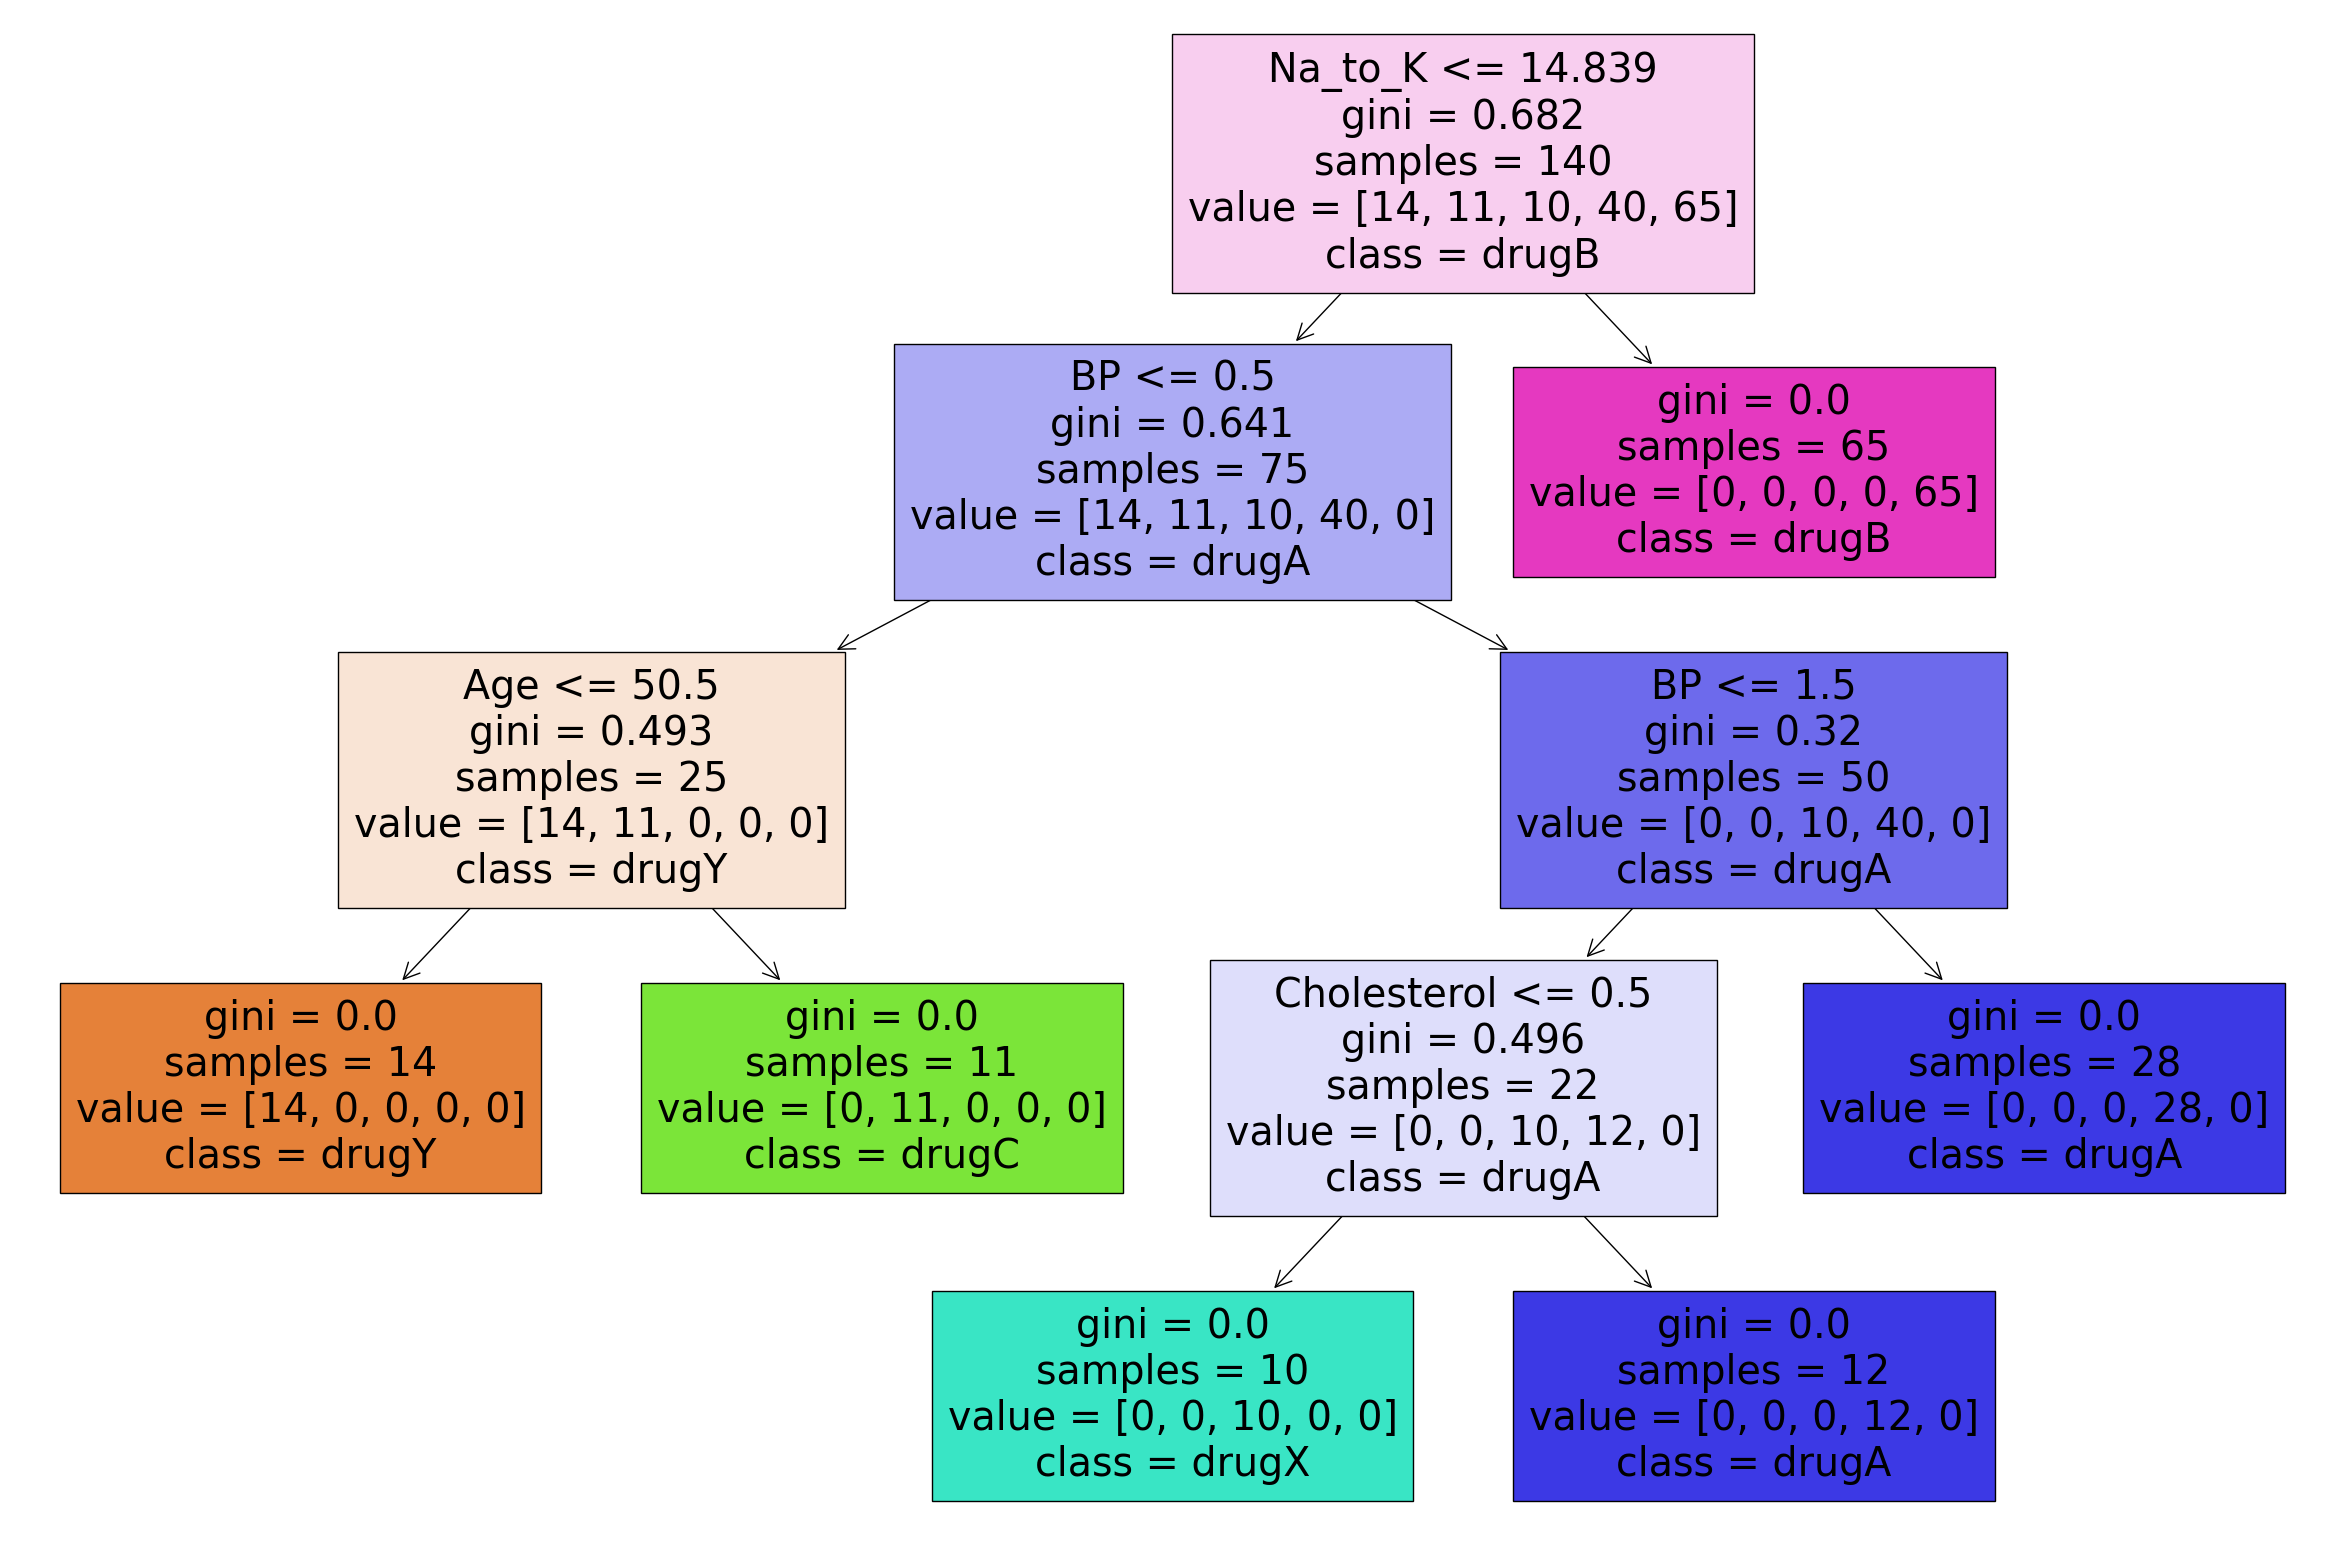

In [14]:
cols = df.drop('Drug',axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols,class_names=classes,filled=True)
plt.show()

Hyperparameters

Decision tree accuracy = 0.8166666666666667


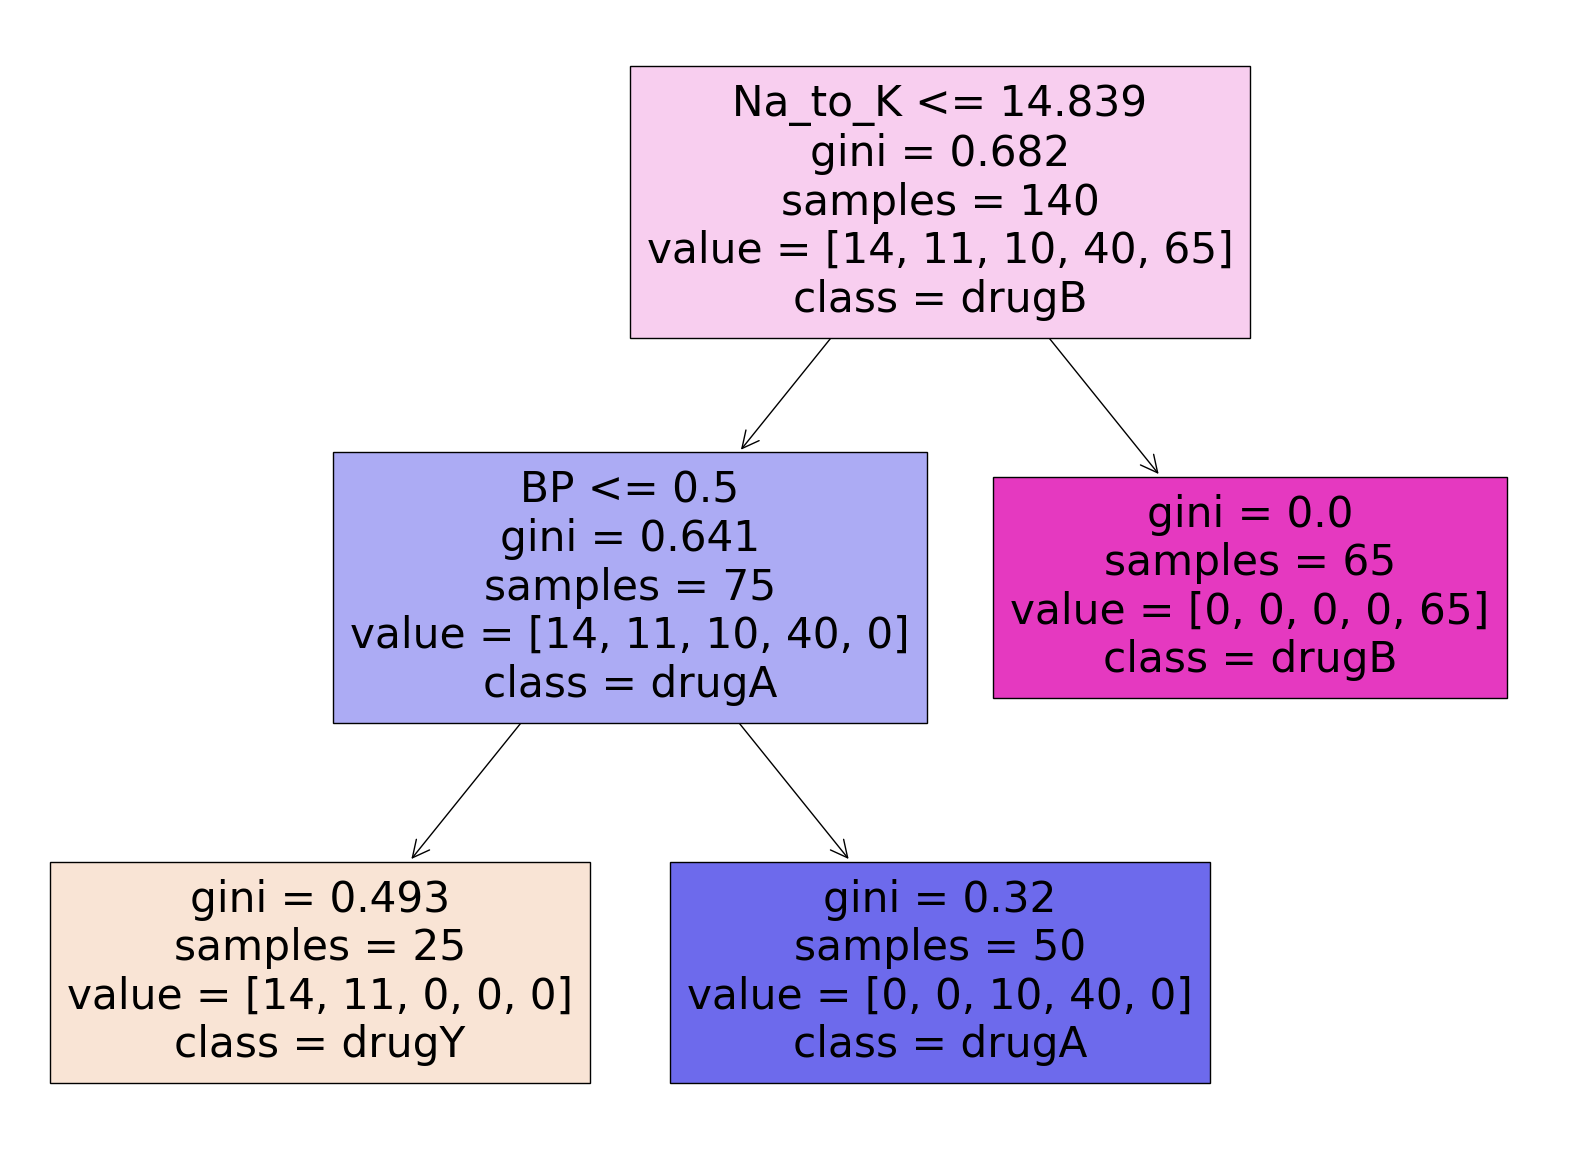

In [25]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.1)
tree_model.fit(x_train,y_train)
y_predict = tree_model.predict(x_test)
print(f"Decision tree accuracy = {accuracy_score(y_test,y_predict)}")


plt.figure(figsize=(20,15))
tree.plot_tree(tree_model,feature_names=cols,class_names=classes,filled=True)
plt.show()

max depth - shajara qavatlari soni

Decision tree accuracy = 0.8166666666666667


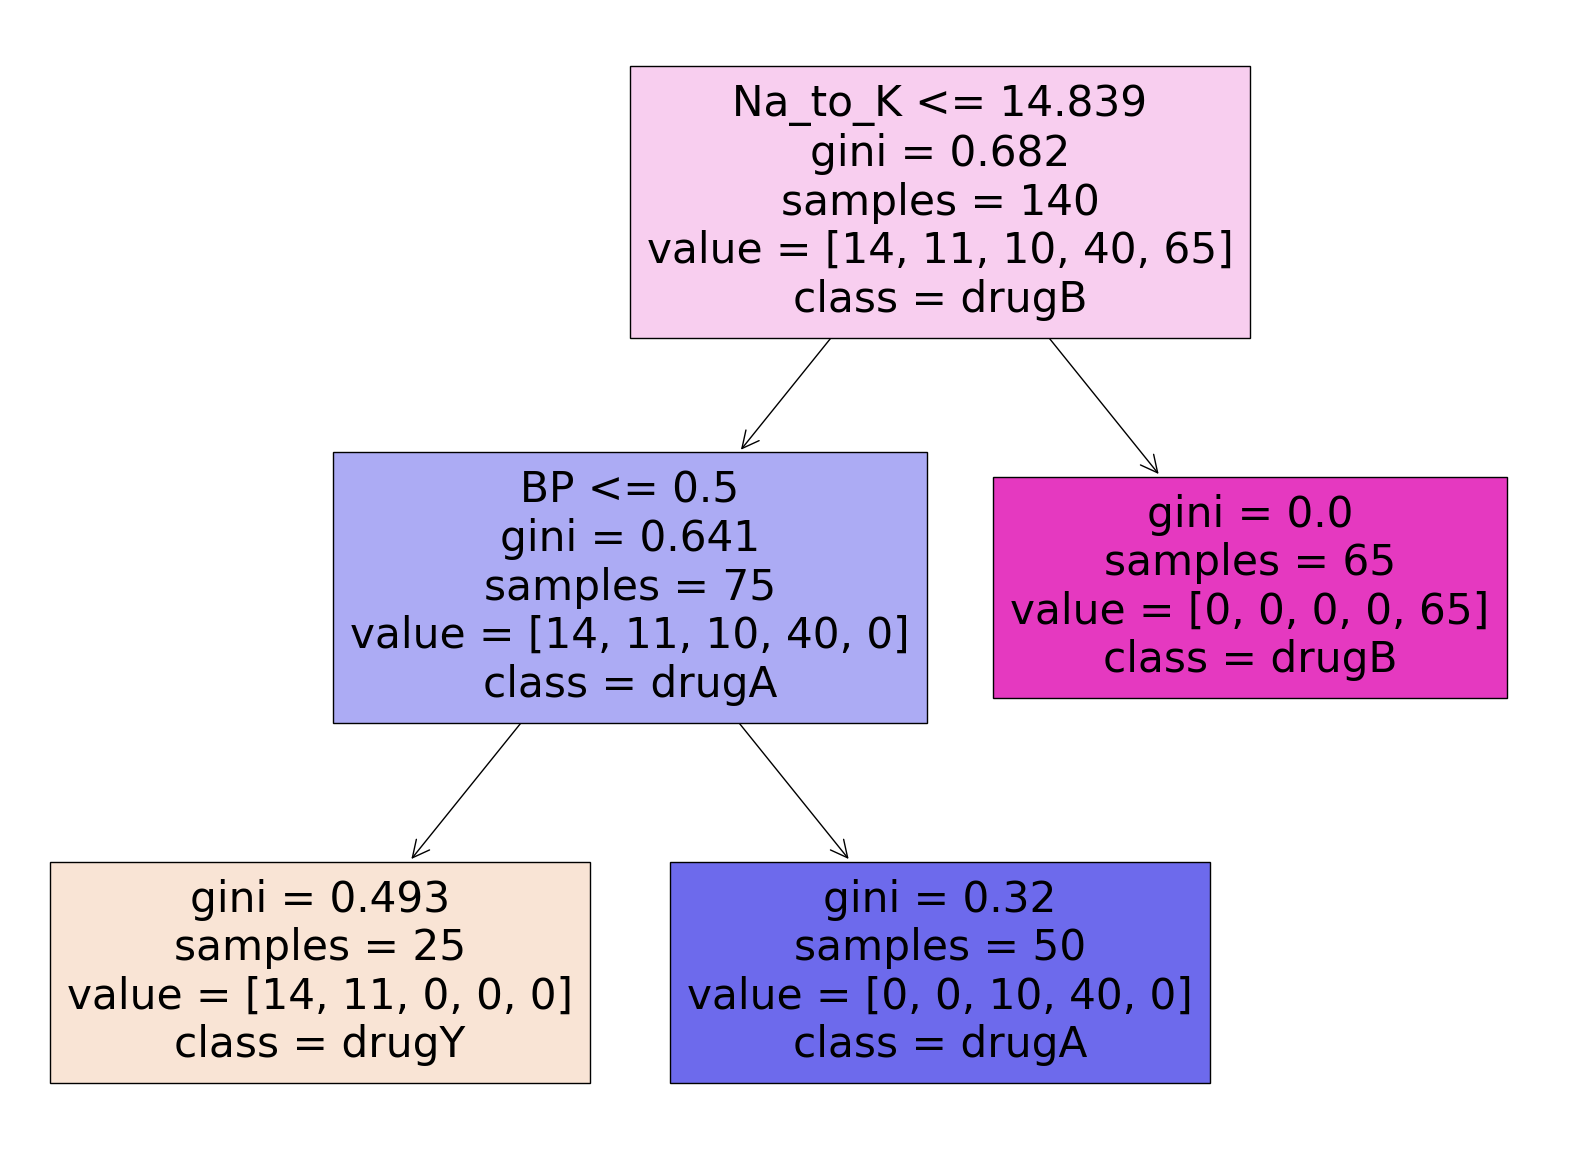

In [28]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.1,max_depth=4)
tree_model.fit(x_train,y_train)
y_predict = tree_model.predict(x_test)
print(f"Decision tree accuracy = {accuracy_score(y_test,y_predict)}")


plt.figure(figsize=(20,15))
tree.plot_tree(tree_model,feature_names=cols,class_names=classes,filled=True)
plt.show()

min samples leaf - leaf node (yakuniy barg tugun) hosil qilish uchun eng kam elementlar soni

Decision tree accuracy = 1.0


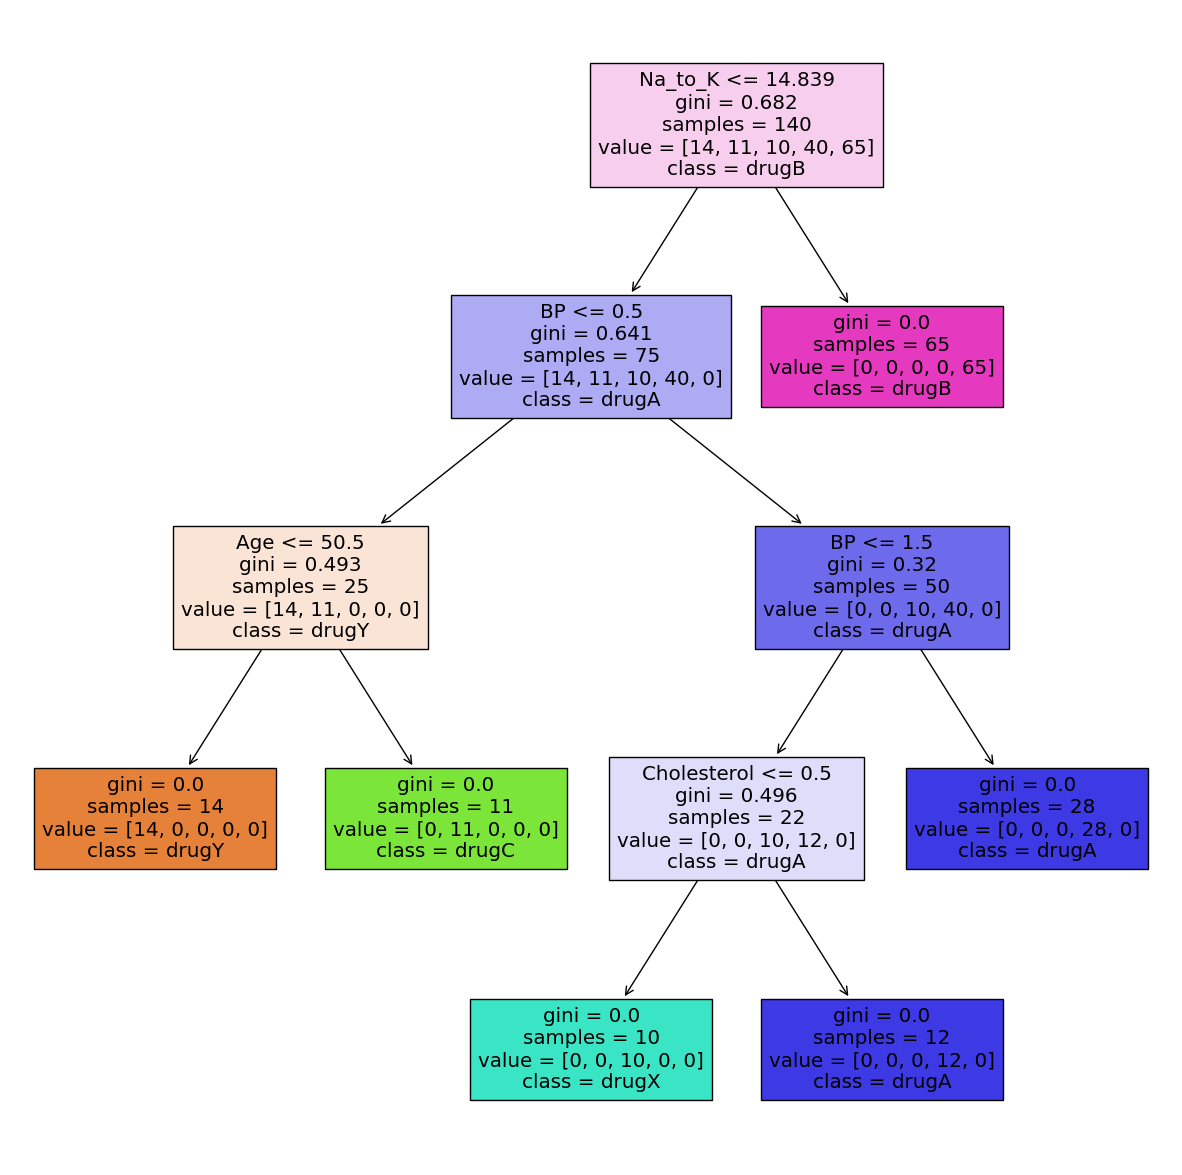

In [40]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0,min_samples_leaf=5,max_depth=4)
tree_model.fit(x_train,y_train)
y_predict = tree_model.predict(x_test)
print(f"Decision tree accuracy = {accuracy_score(y_test,y_predict)}")


plt.figure(figsize=(15,15))
tree.plot_tree(tree_model,feature_names=cols,class_names=classes,filled=True)
plt.show()

Random forest classifier

In [42]:
RF_model = RandomForestClassifier(n_estimators=20)
RF_model.fit(x_train,y_train)
y_pred = RF_model.predict(x_test)
print(classification_report(y_test,y_pred))

<ipython-input-42-040c9dd528ba>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(x_train,y_train)


              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         9
       drugB       1.00      1.00      1.00         5
       drugC       1.00      0.83      0.91         6
       drugX       0.93      1.00      0.97        14
       drugY       1.00      1.00      1.00        26

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.97        60
weighted avg       0.98      0.98      0.98        60



<Axes: >

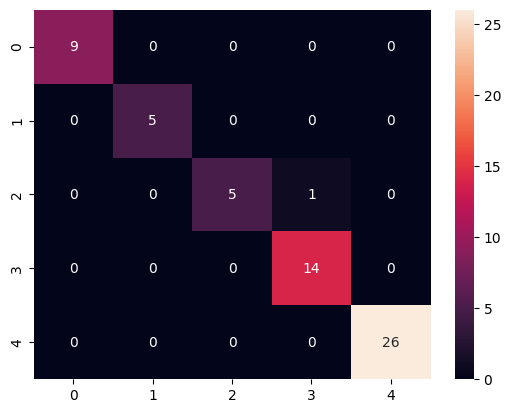

In [47]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [48]:
print(f"accuracy: {accuracy_score(y_test,y_pred)}")

accuracy: 0.9833333333333333


Logistic regression

In [51]:
LR_model = LogisticRegression()
LR_model.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
y_predict = LR_model.predict(x_test)
print('accuracy= ',accuracy_score(y_test,y_predict))

accuracy=  0.8
